In [1]:
###: Loading H2O Library

In [2]:
import h2o

In [3]:
###: Get H2O Version

In [4]:
h2o.__version__

u'3.14.0.7'

In [5]:
###: Initalizing H2O cluster

In [6]:
h2o.init()

ERROR:h2o:Key init.version_check is not a valid config key


Checking whether there is an H2O instance running at http://localhost:54321. connected.


H2O cluster uptime:,2 days 4 hours 39 mins
H2O cluster version:,3.14.0.7
H2O cluster version age:,1 month and 2 days
H2O cluster name:,H2O_from_python_avkashchauhan_d7ekmq
H2O cluster total nodes:,1
H2O cluster free memory:,2.579 Gb
H2O cluster total cores:,8
H2O cluster allowed cores:,8
H2O cluster status:,"locked, healthy"
H2O connection url:,http://localhost:54321
H2O connection proxy:,None


In [7]:
###: Importing both training and test dataset into H2O cluster memory

In [8]:
df = h2o.import_file("https://raw.githubusercontent.com/Avkash/mldl/master/data/titanic_list.csv")

Parse progress: |█████████████████████████████████████████████████████████| 100%


In [9]:
### Understanding the dataset

In [10]:
df.describe()

Rows:1309
Cols:14




,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
type,int,int,string,enum,real,int,int,int,real,enum,enum,int,int,enum
mins,1.0,0.0,NaN,,0.1667,0.0,0.0,680.0,0.0,,,1.0,1.0,
mean,2.294881589,0.381970970206,NaN,,29.8811345124,0.498854087089,0.385026737968,249039.136886,33.2954792813,,,9.40452261307,160.809917355,
maxs,3.0,1.0,NaN,,80.0,8.0,9.0,3101298.0,512.3292,,,16.0,328.0,
sigma,0.83783601897,0.486055170866,NaN,,14.4134996999,1.0416583906,0.86556027535,442685.317677,51.7586682392,,,4.3574169836,97.696921996,
zeros,0,809,0,,0,891,1002,0,17,,,0,0,
missing,0,0,0,0,263,0,0,352,1,1014,2,911,1188,564
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0,0.0,0.0,24160.0,211.3375,B5,S,2.0,nan,"St Louis, MO"
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781.0,151.55,C22 C26,S,11.0,nan,"Montreal, PQ / Chesterville, ON"
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0,1.0,2.0,113781.0,151.55,C22 C26,S,nan,nan,"Montreal, PQ / Chesterville, ON"


In [11]:
###: Listing all columns

In [12]:
df.col_names

[u'pclass',
 u'survived',
 u'name',
 u'sex',
 u'age',
 u'sibsp',
 u'parch',
 u'ticket',
 u'fare',
 u'cabin',
 u'embarked',
 u'boat',
 u'body',
 u'home.dest']

In [13]:
###: Setting response variable

In [14]:
response = "survived"

In [15]:
###: Setting response variable to enum or categorical so we can build a classification model

In [16]:
df[response] = df[response].asfactor()

In [17]:
###: Spliting the dataset into train and test 

In [18]:
train_df, test_df = df.split_frame(ratios=[0.9])

In [19]:
print(train_df.shape)
print(test_df.shape)

(1188, 14)
(121, 14)


In [20]:
###: Understanding Training dataset

In [21]:
train_df.describe()

Rows:1188
Cols:14




,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
type,int,enum,string,enum,real,int,int,int,real,enum,enum,int,int,enum
mins,1.0,,NaN,,0.1667,0.0,0.0,680.0,0.0,,,1.0,1.0,
mean,2.29966329966,,NaN,,29.8347339286,0.513468013468,0.393939393939,250086.030963,32.9276743892,,,9.41736694678,159.807017544,
maxs,3.0,,NaN,,80.0,8.0,9.0,3101298.0,512.3292,,,16.0,328.0,
sigma,0.837877461027,,NaN,,14.4986294901,1.06518170145,0.884022915585,451110.160975,50.0417260942,,,4.36624318659,98.2345826308,
zeros,0,,0,,0,800,907,0,16,,,0,0,
missing,0,0,0,0,236,0,0,316,1,920,2,831,1074,509
0,1.0,1,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781.0,151.55,C22 C26,S,11.0,nan,"Montreal, PQ / Chesterville, ON"
1,1.0,0,"Allison, Miss. Helen Loraine",female,2.0,1.0,2.0,113781.0,151.55,C22 C26,S,nan,nan,"Montreal, PQ / Chesterville, ON"
2,1.0,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0,1.0,2.0,113781.0,151.55,C22 C26,S,nan,nan,"Montreal, PQ / Chesterville, ON"


In [22]:
###: Understanding Test dataset

In [23]:
test_df.describe()

Rows:121
Cols:14




,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
type,int,enum,string,enum,real,int,int,int,real,enum,enum,int,int,enum
mins,1.0,,NaN,,3.0,0.0,0.0,694.0,0.0,,,1.0,69.0,
mean,2.2479338843,,NaN,,30.3510638298,0.355371900826,0.297520661157,238299.235294,36.903614876,,,9.29268292683,177.142857143,
maxs,3.0,,NaN,,71.0,4.0,4.0,3101296.0,512.3292,,,16.0,305.0,
sigma,0.839454105709,,NaN,,13.5856165613,0.762228138773,0.653766371359,346547.752824,66.4400584568,,,4.33153496141,93.9209393966,
zeros,0,,0,,0,91,95,0,1,,,0,0,
missing,0,0,0,0,27,0,0,36,0,94,0,80,114,55
0,1.0,1,"Allen, Miss. Elisabeth Walton",female,29.0,0.0,0.0,24160.0,211.3375,B5,S,2.0,nan,"St Louis, MO"
1,1.0,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0,1.0,2.0,113781.0,151.55,C22 C26,S,nan,135.0,"Montreal, PQ / Chesterville, ON"
2,1.0,0,"Baxter, Mr. Quigg Edmond",male,24.0,0.0,1.0,nan,247.5208,B58 B60,C,nan,nan,"Montreal, PQ"


In [24]:
###: Training and test dataset - columns and rows details

In [25]:
print(train_df.shape)
print(test_df.shape)

(1188, 14)
(121, 14)


In [26]:
###: Training and Test Dataframes - columns names

In [27]:
print(train_df.col_names)
print(test_df.col_names)

[u'pclass', u'survived', u'name', u'sex', u'age', u'sibsp', u'parch', u'ticket', u'fare', u'cabin', u'embarked', u'boat', u'body', u'home.dest']
[u'pclass', u'survived', u'name', u'sex', u'age', u'sibsp', u'parch', u'ticket', u'fare', u'cabin', u'embarked', u'boat', u'body', u'home.dest']


In [28]:
###: Settings all features for supervised machine learning

In [29]:
features = train_df.col_names
print(features)

[u'pclass', u'survived', u'name', u'sex', u'age', u'sibsp', u'parch', u'ticket', u'fare', u'cabin', u'embarked', u'boat', u'body', u'home.dest']


In [30]:
###: Creating a list of all features we will use for machine learning

In [31]:
features.remove(response)
print(features)

[u'pclass', u'name', u'sex', u'age', u'sibsp', u'parch', u'ticket', u'fare', u'cabin', u'embarked', u'boat', u'body', u'home.dest']


In [32]:
###: Ignoring other features which are not needed for training

In [33]:
for feature_name in ['name', 'ticket', 'home.dest']:
    features.remove(feature_name)
print(features)    

[u'pclass', u'sex', u'age', u'sibsp', u'parch', u'fare', u'cabin', u'embarked', u'boat', u'body']


In [34]:
###: Understanding response variable values as historgram in Training data

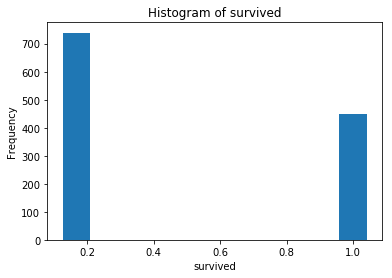

In [35]:
train_df[response].asnumeric().hist()

In [36]:
###: Importing H2O H2OGeneralizedLinearEstimator to build GLM Model

In [37]:
from h2o.estimators.glm import H2OGeneralizedLinearEstimator

In [38]:
###:Building Gradient Boosting (GBM) -  Regression model with cross validation

In [39]:
glm_model_with_cv = H2OGeneralizedLinearEstimator(nfolds=5, 
                                                  family = "Binomial")

In [40]:
###: Training the model

In [41]:
glm_model_with_cv.train(x = features, y = response, training_frame=train_df)

glm Model Build progress: |███████████████████████████████████████████████| 100%


In [42]:
###: Getting model performance

In [43]:
glm_model_with_cv.model_performance(valid=True,test_data=test_df).auc()

0.8408963585434174

In [44]:
###:Building GLM -  Regression model with cross validation and key GLM parameters configuration

In [45]:
glm_model_cv_config = H2OGeneralizedLinearEstimator(nfolds=5,
                                                    family = "binomial",
                                                    keep_cross_validation_predictions=True,
                                                    lambda_search = True,
                                                    fold_assignment="auto",
                                                    alpha = 0.1,
                                                    seed=12345)

In [46]:
###: Training GLM Model

In [47]:
glm_model_cv_config.train(x = features, y = response, 
                                            training_frame=train_df, 
                                           model_id = "glm_model_with_training_and_validtion_python")

glm Model Build progress: |███████████████████████████████████████████████| 100%


In [48]:
###: Getting GLM model performance on test data

In [49]:
glm_model_cv_config.model_performance(valid=True,test_data=test_df).auc()

0.8526610644257703

In [50]:
###: Importing H2O Grid Library

In [51]:
from h2o.grid import H2OGridSearch

In [52]:
###: Settings GLM grid parameters

In [53]:
glm_hyper_params = { 'alpha': [0.01,0.1,0.3,0.5,0.7,0.9], 
                     'lambda': [1e-1,1e-3,1e-5,1e-7,1e-9] }

In [54]:
###: Setting H2O Grid Search Criteria

In [55]:
grid_search_criteria = { 'strategy': "RandomDiscrete", 
                    'seed': 123,
                    'stopping_metric': "AUTO", 
                    'stopping_tolerance': 0.01,
                    'stopping_rounds': 5 }

In [56]:
###: Finalzing the H2O Grid searching settings

In [57]:
glm_grid = H2OGridSearch(model=H2OGeneralizedLinearEstimator(
                                                    nfolds=5,
                                                    family = "binomial",
                                                    keep_cross_validation_predictions=True,
                                                    lambda_search = True,
                                                    fold_assignment="auto",
                                                    seed=12345),
                     hyper_params=glm_hyper_params,
                     search_criteria=grid_search_criteria,
                     grid_id="titnaic_glm_grid")

In [58]:
###: Finally training H2O Grid with data 

In [59]:
glm_grid.train(x=features, y=response, training_frame=train_df)

glm Grid Build progress: |████████████████████████████████████████████████| 100%


In [60]:
###: Finally getting total count of GLM models

In [61]:
len(glm_grid)

31

In [62]:
###: Defining a function to find the best model from the grid based on r2 or auc

In [63]:
def find_best_model_from_grid(h2o_grid, test_parameter):    
    model_list = []
    for grid_item in h2o_grid:
        if test_parameter is "r2":
            if not (grid_item.r2() == "NaN"):
                model_list.append(grid_item.r2())
            else:
                model_list.append(0.0)            
        elif test_parameter is "auc":
            if not (grid_item.auc() == "NaN"):
                model_list.append(grid_item.auc())
            else:
                model_list.append(0.0)            
    #print(model_list)        
    max_index = model_list.index(max(model_list))
    #print(max_index)
    best_model = h2o_grid[max_index]
    print("Model ID with best R2: " +  best_model.model_id)
    if test_parameter is "r2":
        print("Best R2: " +  str(best_model.r2()))
    elif test_parameter is "auc":
        print("Best AUC: " +  str(best_model.auc()))
    return best_model

In [64]:
###: Applying the function to get the best model from the grid

In [65]:
best_model = find_best_model_from_grid(glm_grid, "auc")

Model ID with best R2: titnaic_glm_grid_model_28
Best AUC: 0.913399920648


In [66]:
###: Getting the best model performance on test data

In [67]:
best_model.model_performance(valid=True,test_data=test_df).auc()

0.9067226890756303

In [68]:
###: Performing predictions with one of the above model

In [69]:
glm_predictions = best_model.predict(test_df)

glm prediction progress: |████████████████████████████████████████████████| 100%


In [70]:
glm_predictions

predict,p0,p1
1,4.48822e-05,0.999955
0,0.978321,0.0216787
1,0.409586,0.590414
1,0.357982,0.642018
1,0.0965244,0.903476
1,0.276282,0.723718
1,0.423267,0.576733
1,4.03544e-05,0.99996
0,0.999964,3.55179e-05
1,0.41198,0.58802


In [71]:
###: Understanding/Validating predictions based on prediction results historgram

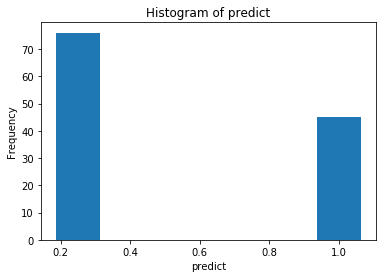

In [72]:
glm_predictions['predict'].asnumeric().hist()

In [73]:
###: Getting Scorring History

In [74]:
best_model.scoring_history()

,,timestamp,duration,iteration,lambda,predictors,deviance_train,deviance_test,deviance_xval,deviance_se
0,,2017-11-22 23:57:43,0.000 sec,9,.1E-8,190,0.680807,NaN,0.0,0.0


In [75]:
###: Getting GBM model variable importance 

In [76]:
best_model.varimp()

In [77]:
###: Getting model variable importance PLOT

Variable importance does not apply to GLM. Will use std_coef_plot() instead.


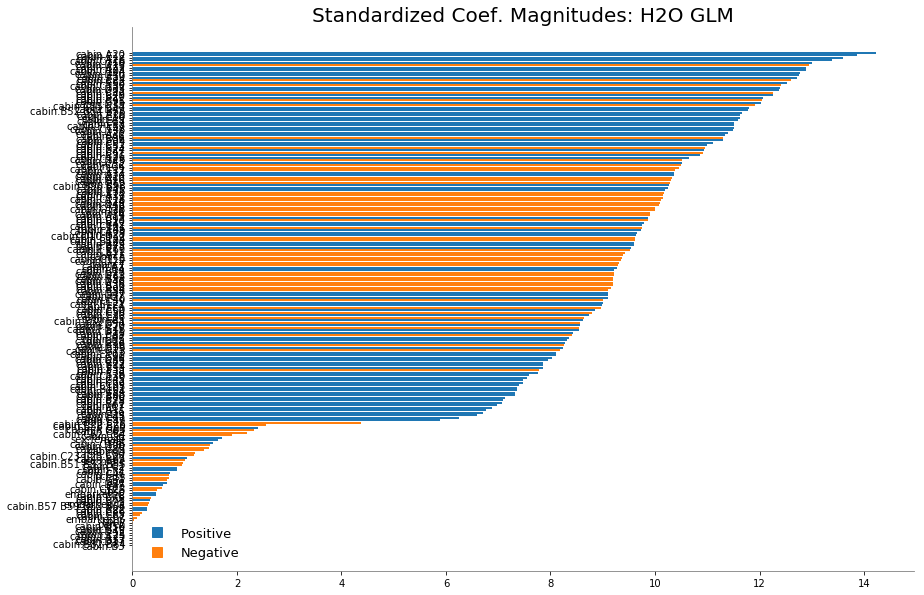

In [78]:
best_model.varimp_plot()